In [1]:
from maws.model_builder import build_model
from torchtext.utils import get_asset_local_path
from IPython.display import display
from maws.utils import start_inference_mode

In [2]:
start_inference_mode(device="cpu")

In [3]:
clip_model = build_model("vit_b16_xlmr_b", "maws_clip")
# clip_model = build_model("vit_l16_xlmr_l", "maws_clip")
# clip_model = build_model("vit_h14_xlmr_l", "maws_clip")
# clip_model = build_model("vit_2b14_xlmr_l", "maws_clip")
_ = clip_model.eval()

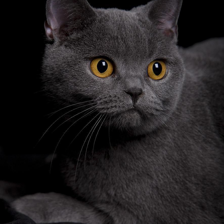

In [4]:
image_path = get_asset_local_path("https://upload.wikimedia.org/wikipedia/commons/5/53/Sheba1.JPG")
display(clip_model.get_cropped_images(image_path))

In [5]:
# English
texts = [
    "a dog",
    "a cat",
    "a mouse",
    "a truck",
    "a plane",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.42655473947525024, 89.6343765258789, 9.344010353088379, 0.48280438780784607, 0.11225719749927521]]


/private/home/mannatsingh/.conda/envs/maws/lib/python3.10/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


In [6]:
# Chinese (simplified)
texts = [
    "一只狗",
    "一只猫",
    "一个鼠标",
    "卡车",
    "一架飞机",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[1.9304252862930298, 86.41828155517578, 9.844347953796387, 1.3144373893737793, 0.4925134479999542]]


In [7]:
# French
texts = [
    "un chien",
    "un chat",
    "une souris",
    "un camion",
    "un avion",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.4897313714027405, 92.72753143310547, 6.432736873626709, 0.20018728077411652, 0.14981156587600708]]


In [8]:
# Hindi
texts = [
    "एक कुत्ता",
    "एक बिल्ली",
    "एक चूहा",
    "एक ट्रक",
    "एक हवाई जहाज",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[1.9921103715896606, 92.52577209472656, 2.360900402069092, 1.0272319316864014, 2.093984842300415]]


In [9]:
# German
texts = [
    "ein Hund",
    "eine Katze",
    "eine Maus",
    "ein LKW",
    "ein Flugzeug",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.8744330406188965, 93.85449981689453, 3.50126314163208, 1.5451905727386475, 0.22461795806884766]]


In [10]:
# Spanish
texts = [
    "un perro",
    "un gato",
    "un ratón",
    "un camión",
    "un autobús",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[1.0338902473449707, 91.00243377685547, 6.767429351806641, 0.7350249886512756, 0.4612196087837219]]


In [11]:
# Portuguese
texts = [
    "um cachorro",
    "um gato",
    "um rato",
    "um caminhão",
    "um ônibus",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.7968398928642273, 92.60812377929688, 5.484171390533447, 0.7968915700912476, 0.3139677345752716]]


In [12]:
# Russian
texts = [
    "собака",
    "кошка",
    "мышь",
    "грузовик",
    "автобус",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.4679006040096283, 96.11727905273438, 3.1064517498016357, 0.22254280745983124, 0.0858195498585701]]


In [13]:
# Polish
texts = [
    "pies",
    "Kot",
    "Mysz",
    "ciężarówka",
    "autobus",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.1849297136068344, 81.64908599853516, 13.98330020904541, 3.798112392425537, 0.3845698833465576]]


In [14]:
# Japanese
texts = [
    "犬",
    "猫",
    "ネズミ",
    "トラック",
    "対",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[1.022695541381836, 89.49217224121094, 5.7848334312438965, 1.8926918506622314, 1.8076095581054688]]


In [15]:
# Emojis 🤩
texts = [
    "🐶",
    "🐱",
    "🐁",
    "🚗",
    "⛴️",
]

print((clip_model.classify(image_path, texts) * 100).tolist())

[[0.5795016884803772, 95.68807220458984, 2.9328672885894775, 0.3446083068847656, 0.4549580514431]]
